# House Sale Price Prediction

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Necessary Libraries](#section2)<br>
3. [Read the Data](#section3)<br>
4. [Initial Data Exploration](#section4)<br>
  - 4.1 [Check if the data is read correctly by checking first few rows](#section401)<br>
  - 4.2 [Check the total number of rows and columns in the data](#section402)<br>
  - 4.3 [Check the data types and figure out if there are any Null values existing in the data set](#section403)<br>
  - 4.4 [List out the columns which are containing Null values so that we can deal with them accordingly](#section404)<br>
  - 4.5 [Check Columns containing Null Values in % in descending order](#section405)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [Airport and Carrier Details](#section501)<br>
    - 5.1.1 [Which were the top 5 flight carriers from NYC in 2013?](#section50101)<br>
    - 5.1.2 [Airports which have maximum number of flights departed from NYC in 2013?](#section50102)<br>
    - 5.1.3 [From each Airport witnin NYC, which are the highest flying carriers?](#section50103)<br>
    - 5.1.4 [Top 5 carriers which have flown maximum miles in 2013 from NYC to various destinations](#section50104)<br>
    - 5.1.5 [Which are the top 20 Destinations from NYC?](#section50105)<br>
  - 5.2 [Departure Analysis](#section502)<br>
    - 5.2.1 [Monthly view of flights departed per carrier?](#section50201)<br>
    - 5.2.2 [Is there any pattern visible resulting into flight departure delays?](#section50202)<br>
    - 5.2.3 [Which carriers operate on daily basis?](#section50203)<br>
    - 5.2.4 [What is the overall departure pattern looking like?](#section50204)<br>
  - 5.3 [Arrival Analysis](#section502)<br>
    - 5.3.1 [How does the flight arrival status look like over 2013?](#section50301)<br>
    - 5.3.2 [Is there any pattern visible resulting into flight arrival delays?](#section50302)<br>
    - 5.3.3 [How are the key Arrival and Departure Parameters Co-related? Is there any emerging pattern?](#section50303)<br>
6. [Conclusion](#section6)

<a id='#section1'></a>
### 1. Problem Statement

The goal of this project is to predict the best selling price of a house given various critical parameters which will form the basis of how the predicted price has been arrived at.

<a id='#section2'></a>
### 2. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import os
%matplotlib inline
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
#sns.set()      # To apply seaborn styles to the plots.

from subprocess import check_output

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 500                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools

<a id='#section3'></a>
### 3. Read the Data

In [2]:
raw_data = pd.read_csv("E:\\Trainings\\INSAID\\CDF - Machine Learning - Term Project\\Kaggle\\test.csv")

<a id='#section4'></a>
### 4. Initial Data Exploration

<a id='#section401'></a>
#### 4.1 Check if the data is read correctly by checking first few rows

In [3]:
raw_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Observation:** The dataset is loaded correctly for processing

<a id='#section402'></a>
#### 4.2 Check the total number of rows and columns in the data

In [4]:
raw_data.shape

(1459, 80)

**Observation:** There are **1460 rows** and **81 columns** in the dataset

<a id='#section403'></a>
#### 4.3 Check the data types and figure out if there are any Null values existing in the data set

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

**Observation:**
1. There are a total of 1460 samples (rows) and 81 columns in the dataframe 
2. As observed, there 3 Float columns, 35 Integer columns whereas 43 columns are of Object data type in the dataset
3. In addition to the data types, we can also see lot of columns having Null values

<a id='#section404'></a>
#### 4.4 List out the columns which are containing Null values so that we can deal with them accordingly

In [6]:
null_columns = raw_data.columns[raw_data.isnull().any()]
(raw_data[null_columns].isnull().sum()).sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu     730 
LotFrontage     227 
GarageYrBlt     78  
GarageCond      78  
GarageQual      78  
GarageFinish    78  
GarageType      76  
BsmtCond        45  
BsmtExposure    44  
BsmtQual        44  
BsmtFinType1    42  
BsmtFinType2    42  
MasVnrType      16  
MasVnrArea      15  
MSZoning        4   
BsmtFullBath    2   
BsmtHalfBath    2   
Utilities       2   
Functional      2   
Exterior2nd     1   
Exterior1st     1   
SaleType        1   
BsmtFinSF1      1   
BsmtFinSF2      1   
BsmtUnfSF       1   
KitchenQual     1   
GarageCars      1   
GarageArea      1   
TotalBsmtSF     1   
dtype: int64

**Observation:**
1. As can be seen above, there are 19 columns which are containing Null values
2. **PoolQC - 1453, MiscFeature - 1406, Alley - 1369, Fence - 1179 and FireplaceQu - 690** are having large number of Null values, whereas, rest of the columns do contain Null values but not extensively

<a id='#section405'></a>
#### 4.5 Check Columns containing Null Values in % in descending order

In [7]:
(((raw_data[null_columns].isnull().sum())/(raw_data.shape[0]))*100).sort_values(ascending=False)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt     5.346127 
GarageCond      5.346127 
GarageQual      5.346127 
GarageFinish    5.346127 
GarageType      5.209047 
BsmtCond        3.084304 
BsmtExposure    3.015764 
BsmtQual        3.015764 
BsmtFinType1    2.878684 
BsmtFinType2    2.878684 
MasVnrType      1.096642 
MasVnrArea      1.028101 
MSZoning        0.274160 
BsmtFullBath    0.137080 
BsmtHalfBath    0.137080 
Utilities       0.137080 
Functional      0.137080 
Exterior2nd     0.068540 
Exterior1st     0.068540 
SaleType        0.068540 
BsmtFinSF1      0.068540 
BsmtFinSF2      0.068540 
BsmtUnfSF       0.068540 
KitchenQual     0.068540 
GarageCars      0.068540 
GarageArea      0.068540 
TotalBsmtSF     0.068540 
dtype: float64

**Observation:** We can see that columns PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual show up as having large number of Null values, thats mainly due to NA available in the data. These NA's are not really Null values, but are actual values, so we will update them with "None" so that they make sense 

<a id='#section5'></a>
#### 5. Descriptive Statistics and Data Profiling

In [8]:
raw_data.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
95%,2846.100000,160.000000,107.450000,16873.000000,9.000000,8.000000,2007.000000,2007.000000,478.950000,1290.600000,448.150000,1488.450000,1782.000000,1829.100000,1116.800000,0.000000,2461.300000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.00000,2007.000000,3.000000,864.000000,319.000000,189.000000,169.100000,0.000000,162.200000,0.000000,0.000000,11.000000,2010.000000
96%,2860.680000,160.000000,110.000000,17798.400000,9.000000,8.000000,2007.000000,2007.680000,506.840000,1348.880000,510.600000,1530.000000,1836.000000,1878.880000,1160.720000,0.000000,2499.680000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,9.000000,2.00000,2007.000000,3.000000,880.000000,351.680000,196.360000,192.000000,0.000000,178.400000,0.000000,0.000000,11.000000,2010.000000
97%,2875.260000,160.000000,117.070000,19511.640000,9.000000,8.000000,2007.000000,2008.000000,544.070000,1414.580000,620.580000,1591.160000

#### Initial Observations from describe
A. LotFrontage:<BR>
1. Mean and Std Dev looks fine <br>
2. There are few Null values (259 to be precise)<br>

B. LotArea: <BR>
1. 99% of LotArea values are showing below or equal to 37567.00, whereas, max value is 215245, its an outlier and needs to be excluded from our analysis <BR>
2. Values above 18000 LotArea can be excluded from analysis as it's on the higher side compared to mean which is anyways effected by higher outlier value, and secondly, values about 18000 form 79 records out of 1460 which is just over 5% of total records and might not impact our analysis<BR>

C. MasVnrArea: <BR>
1. Mean and Std Dev looks fine<br>
2. There is an outlier value of 1600.00 which is far away from 99% value of 791.92<br>
3. There are very few Null values observed, only 8 to be precise<br>

## A. Dealing with NULL Values

In [9]:
#profile = raw_data.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="E:\\Trainings\\INSAID\\CDF - Machine Learning - Term Project\\pre_profile_report.html")

In [10]:
# Create a copy of raw_data so that we can handle null values, outliers, extract required features, etc. without disturbing original data
# We can drop the 'Id' column as it's just a sequential number and not help in our analysis
data = raw_data.copy()
original_ids = data['Id']
data.drop(['Id'],axis=1, inplace=True)
data.shape

(1459, 79)

**Observation:** Looking at the above outcome, it seems that Null values in LotFrontage variable can be dealt with by updating the mean values as there are 259 such records out of 1460 which contain Null

In [11]:
def print_dist_stats(col):
    x = col
    x_mean = x.mean()
    print("Mean: ", x_mean)
    x_median = x.median()
    print("Median: ", x_median)
    x_mode = x.mode()
    print("Mode: ", x_mode)

In [12]:
# Check the mean median and mode for LotFrontage variable and based on the outcome decide how to deal with Null values
print_dist_stats(data['LotFrontage'])

print("LotFrontage Null Count before cleansing: ", data['LotFrontage'].isnull().sum())
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
print("LotFrontage Null Count after cleansing: ",data['LotFrontage'].isnull().sum())

Mean:  68.58035714285714
Median:  67.0
Mode:  0    60.0
dtype: float64
LotFrontage Null Count before cleansing:  227
LotFrontage Null Count after cleansing:  0


In [13]:
# MasVnrArea
print_dist_stats(data['MasVnrArea'])
print("MasVnrArea Null Count before cleansing: ", data['MasVnrArea'].isnull().sum())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())
print("MasVnrArea Null Count after cleansing: ",data['MasVnrArea'].isnull().sum())

Mean:  100.70914127423822
Median:  0.0
Mode:  0    0.0
dtype: float64
MasVnrArea Null Count before cleansing:  15
MasVnrArea Null Count after cleansing:  0


In [14]:
# GarageYrBlt
print_dist_stats(data['GarageYrBlt'])
print("GarageYrBlt Null Count before cleansing: ", data['GarageYrBlt'].isnull().sum())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(1900)
print("GarageYrBlt Null Count after cleansing: ",data['GarageYrBlt'].isnull().sum())

Mean:  1977.7212165097756
Median:  1979.0
Mode:  0    2005.0
dtype: float64
GarageYrBlt Null Count before cleansing:  78
GarageYrBlt Null Count after cleansing:  0


In [15]:
data_null_columns = data.columns[data.isnull().any()]
print((((data[data_null_columns].isnull().sum())/(data.shape[0]))*100).sort_values(ascending=False))

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
GarageCond      5.346127 
GarageQual      5.346127 
GarageFinish    5.346127 
GarageType      5.209047 
BsmtCond        3.084304 
BsmtExposure    3.015764 
BsmtQual        3.015764 
BsmtFinType1    2.878684 
BsmtFinType2    2.878684 
MasVnrType      1.096642 
MSZoning        0.274160 
BsmtFullBath    0.137080 
BsmtHalfBath    0.137080 
Utilities       0.137080 
Functional      0.137080 
Exterior2nd     0.068540 
Exterior1st     0.068540 
SaleType        0.068540 
BsmtFinSF1      0.068540 
BsmtFinSF2      0.068540 
BsmtUnfSF       0.068540 
KitchenQual     0.068540 
GarageCars      0.068540 
GarageArea      0.068540 
TotalBsmtSF     0.068540 
dtype: float64


In [16]:
data_null_columns = data.columns[data.isnull().any()]
print(((data[data_null_columns].isnull().sum())).sort_values(ascending=False))

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu     730 
GarageCond      78  
GarageQual      78  
GarageFinish    78  
GarageType      76  
BsmtCond        45  
BsmtExposure    44  
BsmtQual        44  
BsmtFinType1    42  
BsmtFinType2    42  
MasVnrType      16  
MSZoning        4   
BsmtFullBath    2   
BsmtHalfBath    2   
Utilities       2   
Functional      2   
Exterior2nd     1   
Exterior1st     1   
SaleType        1   
BsmtFinSF1      1   
BsmtFinSF2      1   
BsmtUnfSF       1   
KitchenQual     1   
GarageCars      1   
GarageArea      1   
TotalBsmtSF     1   
dtype: int64


In [17]:
# Even though PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType2, 
# BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual shows as Null values, based on data description, NA is a valid value hence we 
# can update a valid text like NN (Not Null) instead of NA so that it does not get picked by isnull
# From test data added: 'MSZoning', 'Functional', 'Utilities', 'SaleType', 'KitchenQual', 'Exterior2nd', 'Exterior1st'
a = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical', 
     'MSZoning', 'Functional', 'Utilities', 'SaleType', 'KitchenQual', 'Exterior2nd', 'Exterior1st']
for i in a:
    data[i].fillna('NN', inplace=True)
    
# PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType2, 
# BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual

#data['FireplaceQu'].fillna('NN', inplace=True)

In [18]:
data_null_columns = data.columns[data.isnull().any()]
#print(((data[data_null_columns].isnull().sum())).sort_values(ascending=False))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 no

In [19]:
# Check the mean median and mode for LotFrontage variable and based on the outcome decide how to deal with Null values
#print_dist_stats(data['BsmtHalfBath'])
#print_dist_stats(data['BsmtFullBath'])
#data.groupby('BsmtFullBath').size()
#print_dist_stats(data['GarageArea'])
#print_dist_stats(data['GarageCars'])
#print_dist_stats(data['TotalBsmtSF'])
#print_dist_stats(data['BsmtUnfSF'])
#print_dist_stats(data['BsmtFinSF2'])
#print_dist_stats(data['BsmtFinSF1'])
na_cols = ['BsmtHalfBath', 'BsmtFullBath', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']
for i in na_cols:
    print(i + "Null Count before cleansing: ", data[i].isnull().sum())
    data[i] = data[i].fillna(data[i].median())
    print(i + "Null Count after cleansing: ",data[i].isnull().sum())

BsmtHalfBathNull Count before cleansing:  2
BsmtHalfBathNull Count after cleansing:  0
BsmtFullBathNull Count before cleansing:  2
BsmtFullBathNull Count after cleansing:  0
GarageAreaNull Count before cleansing:  1
GarageAreaNull Count after cleansing:  0
GarageCarsNull Count before cleansing:  1
GarageCarsNull Count after cleansing:  0
TotalBsmtSFNull Count before cleansing:  1
TotalBsmtSFNull Count after cleansing:  0
BsmtUnfSFNull Count before cleansing:  1
BsmtUnfSFNull Count after cleansing:  0
BsmtFinSF2Null Count before cleansing:  1
BsmtFinSF2Null Count after cleansing:  0
BsmtFinSF1Null Count before cleansing:  1
BsmtFinSF1Null Count after cleansing:  0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 no

In [21]:
data.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99], include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459,1459.000000,1459.000000,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459,1459,1459,1459,1459.000000,1459,1459,1459,1459,1459,1459,1459,1459.000000,1459,1459.000000,1459.000000,1459.000000,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459.000000,1459,1459.00000,1459,1459,1459.000000,1459,1459.000000,1459.000000,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459,1459
unique,NaN,6,NaN,NaN,2,3,4,4,2,5,3,25,9,5,5,7,NaN,NaN,NaN,NaN,6,4,14,16,5,NaN,4,5,6,5,5,5,7,NaN,7,NaN,NaN,NaN,4,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,8,NaN,6,7,NaN,4,NaN,NaN,5,6,3,NaN,NaN,NaN,NaN,NaN,NaN,3,5,4,NaN,NaN,NaN,10,6
top,NaN,RL,NaN,NaN,Pave,NN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NN,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,NN,NN,NN,NaN,NaN,NaN,WD,Normal
freq,NaN,1114,NaN,NaN,1453,1352,934,1311,1457,1081,1396,218,1251,1444,1205,745,NaN,NaN,NaN,NaN,1169,1442,510,510,878,NaN,892,1256,661,634,1295,951,431,NaN,1237,NaN,NaN,NaN,1446,752,1358,1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757,NaN,1357,NaN,730,853,NaN,625,NaN,NaN,1293,1328,1301,NaN,NaN,NaN,NaN,NaN,NaN,1456,1169,1408,NaN,NaN,NaN,1258,1204
mean,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.078821,5.553804,1971.357779,1983.662783,NaN,NaN,NaN,NaN,NaN,99.673749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.142906,NaN,52.583276,554.230295,1046.078136,NaN,NaN,NaN,NaN,1156.534613,325.967786,3.543523,1486.045922,0.433859,0.065113,1.570939,0.377656,2.854010,1.042495,NaN,6.385195,NaN,0.58122,NaN,NaN,1973.566141,NaN,1.766278,472.773818,NaN,NaN,NaN,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,42.746880,NaN,20.561228,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436812,1.113740,30.390071,21.130467,NaN,NaN,NaN,NaN,NaN,177.001792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.117812,NaN,176.698671,437.117479,442.749327,NaN,NaN,NaN,NaN,398.165820,420.610226,44.043251,485.566099,0.530527,0.252307,0.555190,0.503017,0.829788,0.208472,NaN,1.508895,NaN,0.64742,NaN,NaN,31.098480,NaN,0.775703,216.974247,NaN,NaN,NaN,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN,0.00000,NaN,NaN,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000

In [22]:
data.shape

(1459, 79)

**Observation:**
1. As we can see from the Info and Describe output, we have dealt with all the Null values approproiately without deleting any rows
2. We have dropped 'Id' column as its just a unique identified and not required for our analysis
3. Thus, we now have 1460 rows and 80 columns to deal with from hereon
4. As we have dealt with Null values, we will now deal with outliers next

## B. Dealing with Outliers

**Exploring Probability Distribution Functions (PDFs)**

In [23]:
data_1 = data.copy()

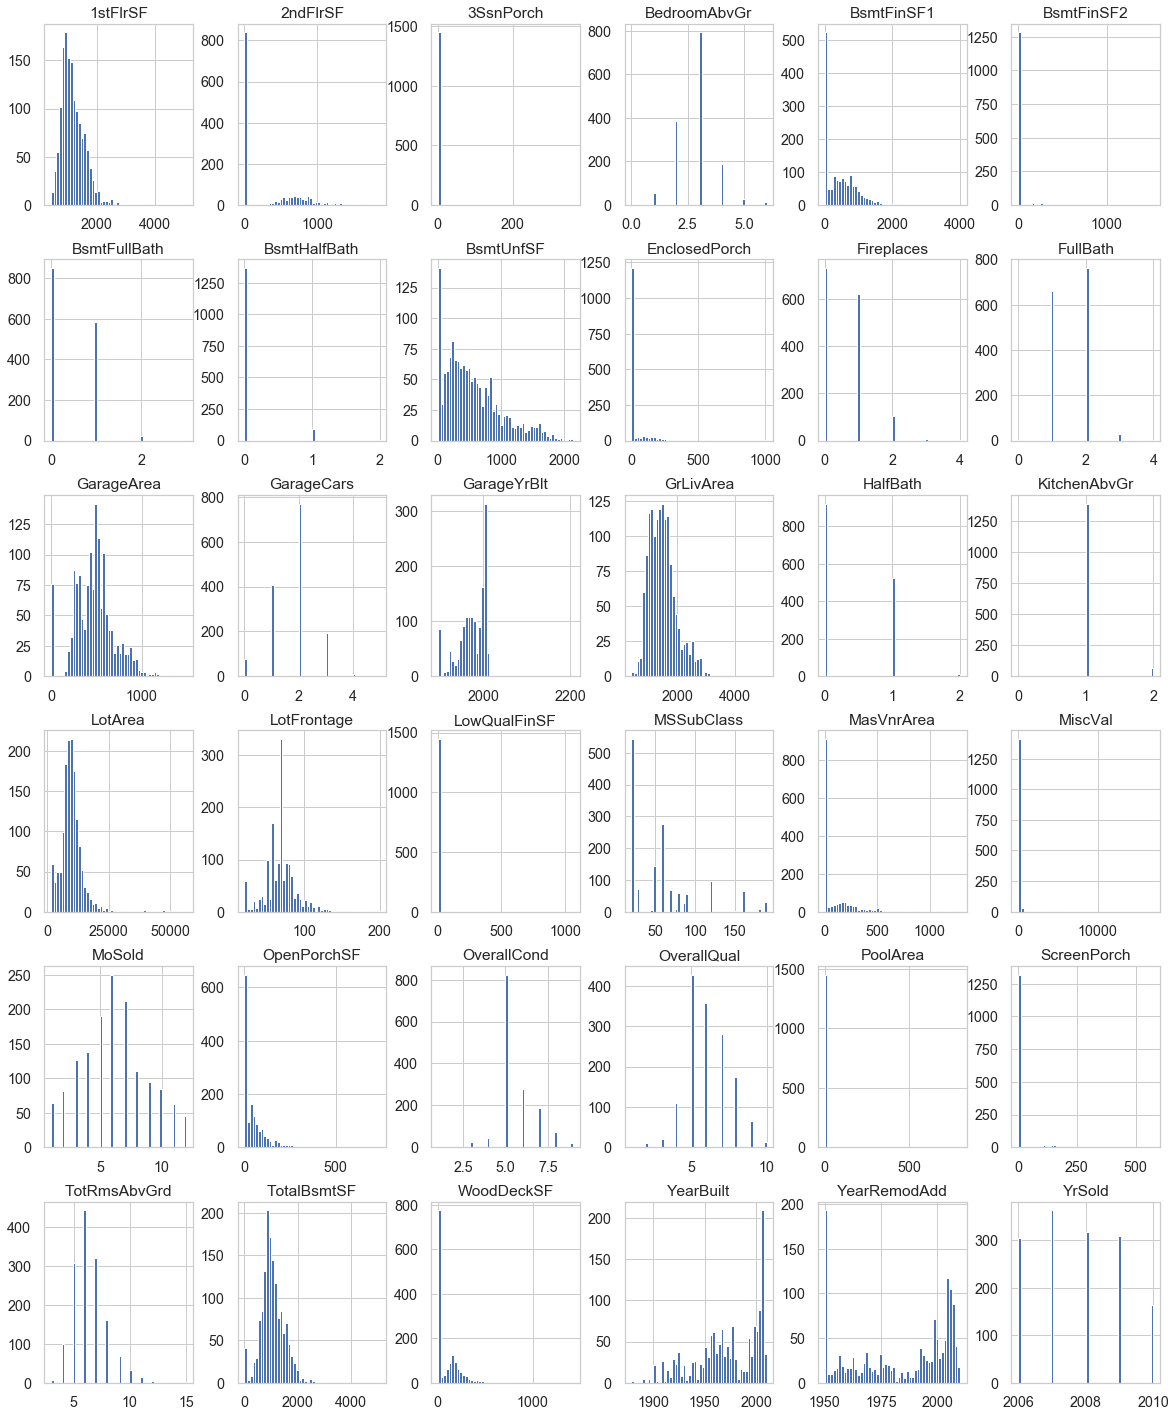

In [24]:
data_1.hist(bins=50, figsize=(20,25))
plt.show()

In [25]:
# Firstly let's check the target variable if it's normally didtributed, if not, lets normalize it
#sns.distplot(data_1['SalePrice'])

In [26]:
# We can see positive skeweness, which means that it has outliers and not normally distributed
# We will log transfor the variable and check the distribution
#print ('Skewness Before Log Transformation is: ', data_1['SalePrice'].skew())
#data_1['SalePrice_Log'] = np.log(data_1['SalePrice'])
#print ('Skewness After Log Transformation is: ', data_1['SalePrice_Log'].skew())
#sns.distplot(data_1['SalePrice_Log'])

In [27]:
# As we have taken natural log of SalePrice, we don't need original column any more, hence, let's drop it
#data_1.drop('SalePrice',axis=1, inplace=True)

In [28]:
data_1.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,439.142906,52.583276,554.230295,1046.078136,1156.534613,325.967786,3.543523,1486.045922,0.433859,0.065113,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1973.566141,1.766278,472.773818,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,20.561228,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,455.117812,176.698671,437.117479,442.749327,398.165820,420.610226,44.043251,485.566099,0.530527,0.252307,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,31.098480,0.775703,216.974247,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.500000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1956.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.580357,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1977.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,0.000000,797.500000,1304.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2001.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
90%,120.000000,91.000000,14259.000000,8.000000,7.000000,2006.000000,2007.000000,309.200000,1039.200000,139.200000,1195.600000,1615.400000,1671.000000,908.400000,0.000000,2134.400000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.00000,2006.000000,3.000000,758.000000,256.000000,132.200000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000
95%,160.000000,105.000000,16873.000000,9.000000,8.000000,2007.000000,2007.000000,473.700000,1290.400000,448.100000,1488.300000,1782.000000,1829.100000,1116.800000,0.000000,2461.300000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.00000,2007.000000,3.000000,864.000000,319.000000,189.000000,169.100000,0.000000,162.200000,0.000000,0.000000,11.000000,2010.000000
96%,160.000000,108.680000,17798.400000,9.000000,8.000000,2007.000000,2007.680000,505.360000,1348.720000,510.400000,1530.000000,1836.000000,1878.880000,1160.720000,0.000000,2499.680000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,9.000000,2.0000

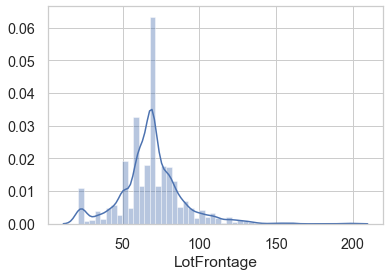

In [29]:
sns.distplot(data_1['LotFrontage'])

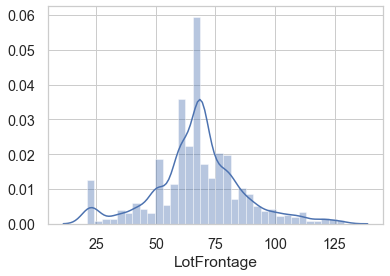

In [30]:
q = data_1['LotFrontage'].quantile(0.99)
data_2 = data_1[data_1['LotFrontage']<q]
sns.distplot(data_2['LotFrontage'])

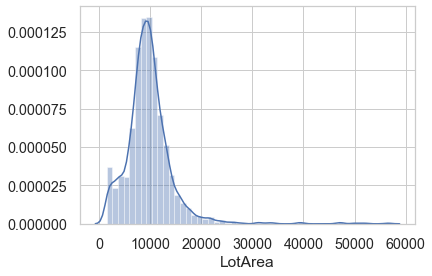

In [31]:
sns.distplot(data_2['LotArea'])

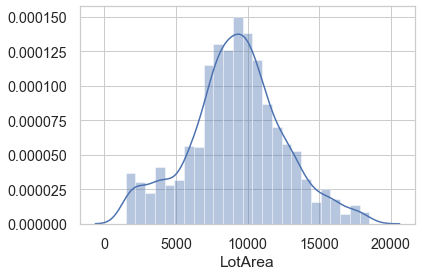

In [32]:
q = data_2['LotArea'].quantile(0.97)
data_3 = data_2[data_2['LotArea']<=q]
sns.distplot(data_3['LotArea'])

In [33]:
quantitative = [f for f in data_3.columns if data_3.dtypes[f] != 'object']
qualitative = [f for f in data_3.columns if data_3.dtypes[f] == 'object']

In [34]:
#f = pd.melt(data_3, value_vars=quantitative)
#g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
#g = g.map(sns.distplot, "value")

In [35]:
data_3.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,57.953571,67.269196,9188.971429,6.079286,5.567857,1971.596429,1983.840000,95.710714,432.288214,51.675000,551.707857,1035.797857,1137.320000,326.910000,3.692857,1467.922857,0.431429,0.063571,1.567143,0.372143,2.845714,1.044286,6.360000,0.556429,1973.723571,1.750000,466.440714,92.335714,47.189286,22.010714,1.870000,16.577857,1.100000,46.762143,6.087857,2007.789286
std,42.894821,18.471933,3333.597129,1.428846,1.104786,30.484918,21.154562,165.822041,443.071947,174.274805,434.365798,420.354291,373.099452,417.327371,44.956241,465.557584,0.528946,0.249864,0.550319,0.500974,0.819994,0.212636,1.491113,0.627886,31.297827,0.775104,214.424217,123.749338,66.768721,58.139580,20.626124,55.897547,24.597547,456.510204,2.714454,1.303988
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7278.500000,5.000000,5.000000,1953.000000,1963.750000,0.000000,0.000000,0.000000,220.000000,783.500000,865.500000,0.000000,0.000000,1103.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1956.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.580357,9247.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,342.500000,0.000000,456.000000,982.000000,1064.000000,0.000000,0.000000,1417.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1977.000000,2.000000,473.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,77.000000,11091.000000,7.000000,6.000000,2001.000000,2004.000000,162.000000,741.000000,0.000000,796.000000,1284.500000,1361.250000,676.000000,0.000000,1707.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
90%,120.000000,89.100000,13300.000000,8.000000,7.000000,2006.000000,2006.000000,305.100000,1029.100000,136.200000,1180.100000,1602.100000,1651.100000,908.000000,0.000000,2098.200000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2006.000000,3.000000,746.100000,252.000000,130.000000,100.100000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000
95%,160.000000,100.000000,14868.900000,9.000000,8.000000,2007.000000,2007.000000,456.500000,1271.950000,435.350000,1474.600000,1765.450000,1803.050000,1104.350000,0.000000,2422.500000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,856.150000,312.100000,180.100000,168.000000,0.000000,160.050000,0.000000,0.000000,11.000000,2010.000000
96%,160.000000,102.000000,15417.440000,9.000000,8.000000,2007.000000,2008.000000,502.080000,1341.200000,497.400000,1528.080000,1822.000000,1838.320000,1142.320000,0.000000,2490.080000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,9.0000

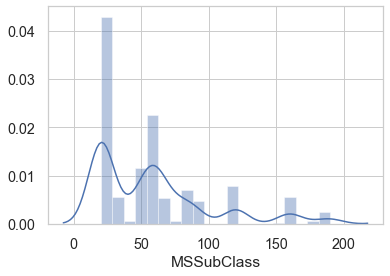

In [36]:
sns.distplot(data_3['MSSubClass'])

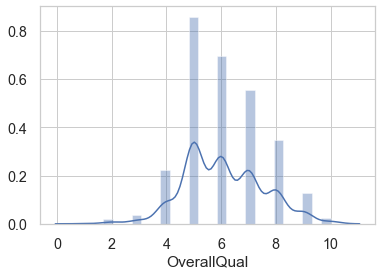

In [37]:
sns.distplot(data_3['OverallQual'])

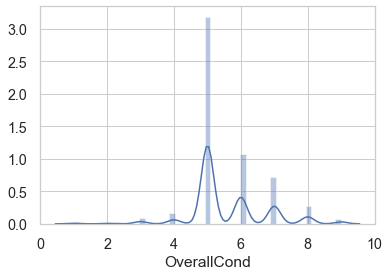

In [38]:
sns.distplot(data_3['OverallCond'])

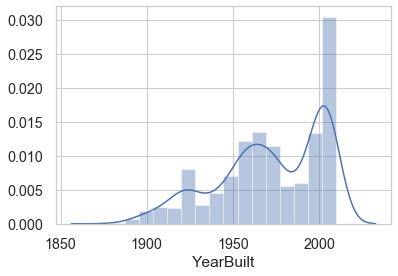

In [39]:
sns.distplot(data_3['YearBuilt'])

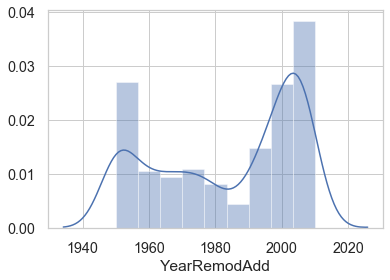

In [40]:
sns.distplot(data_3['YearRemodAdd'])

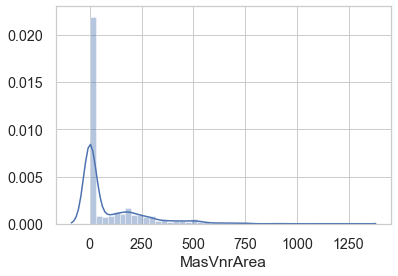

In [41]:
sns.distplot(data_3['MasVnrArea'])

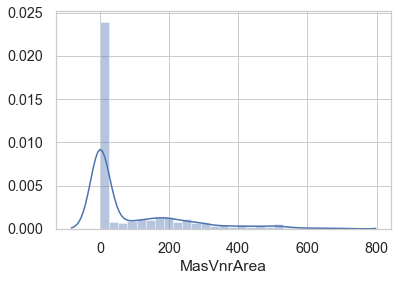

In [42]:
q = data_3['MasVnrArea'].quantile(0.99)
data_4 = data_3[data_3['MasVnrArea']<=q]
sns.distplot(data_4['MasVnrArea'])

In [43]:
data_4.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,58.059163,67.061843,9156.622655,6.054834,5.573593,1971.356421,1983.682540,87.731602,424.975108,51.191919,551.383117,1027.678211,1129.858586,325.040404,3.730159,1458.629149,0.424964,0.064214,1.562771,0.368687,2.847042,1.044733,6.339105,0.549784,1973.505051,1.740981,463.292208,91.182540,46.875902,22.233045,1.888889,16.593795,1.111111,47.234488,6.095960,2007.787879
std,42.935845,18.353158,3307.689007,1.405464,1.108872,30.425810,21.161376,145.200502,434.156465,171.331226,435.125264,410.026484,363.456225,415.320576,45.181344,455.941765,0.525657,0.251041,0.548736,0.500253,0.817486,0.213661,1.471908,0.623872,31.264153,0.771333,211.752926,121.947248,66.749592,58.390344,20.729248,55.915358,24.721304,458.787343,2.713017,1.301939
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7244.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.000000,782.000000,864.000000,0.000000,0.000000,1100.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1956.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.580357,9215.500000,6.000000,5.000000,1973.000000,1992.500000,0.000000,338.500000,0.000000,456.000000,979.500000,1060.000000,0.000000,0.000000,1409.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1977.000000,2.000000,472.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,76.000000,11068.500000,7.000000,6.000000,2001.000000,2004.000000,150.000000,734.000000,0.000000,796.000000,1272.750000,1357.500000,673.750000,0.000000,1694.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
90%,120.000000,88.000000,13202.000000,8.000000,7.000000,2006.000000,2006.000000,295.500000,1011.500000,137.000000,1180.500000,1592.000000,1644.000000,899.500000,0.000000,2062.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2006.000000,3.000000,730.000000,252.000000,130.000000,101.500000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000
95%,160.000000,98.750000,14694.750000,8.000000,8.000000,2007.000000,2007.000000,424.250000,1237.750000,435.000000,1483.000000,1737.500000,1782.000000,1100.500000,0.000000,2383.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,850.000000,312.000000,180.000000,168.000000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000
96%,160.000000,101.600000,15400.600000,9.000000,8.000000,2007.000000,2008.000000,462.000000,1308.600000,496.200000,1529.200000,1782.000000,1824.000000,1142.000000,0.000000,2467.600000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,9.00000

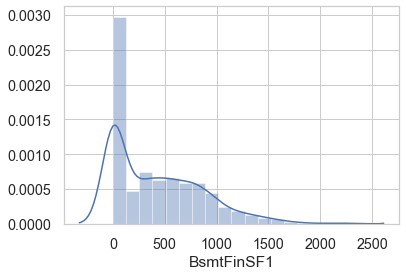

In [44]:
sns.distplot(data_4['BsmtFinSF1'])

In [45]:
#data_4['BsmtFinSF1_Log'] = np.log(data_4['BsmtFinSF1'])
#sns.distplot(data_4['BsmtFinSF1_Log'])

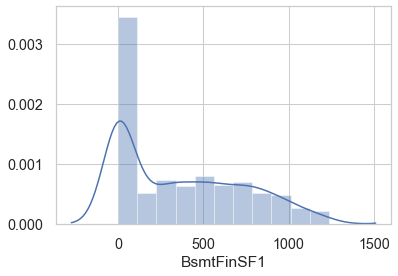

In [46]:
q = data_4['BsmtFinSF1'].quantile(0.95)
data_5 = data_4[data_4['BsmtFinSF1']<=q]
#q1 = data_5['BsmtFinSF1'].quantile(0.01)
#data_6 = data_5[data_5['BsmtFinSF1']>q1]
sns.distplot(data_5['BsmtFinSF1'])

In [47]:
data_5.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.00000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,58.822188,66.381072,9025.618541,5.966565,5.592705,1969.942249,1982.789514,80.082067,368.120441,52.268997,567.109422,987.633739,1093.753799,338.949088,3.928571,1436.631459,0.389058,0.06231,1.543313,0.372340,2.861702,1.044073,6.307751,0.516717,1972.251520,1.701368,452.132219,88.296353,45.079787,22.897416,1.392097,14.623860,1.060790,49.746960,6.089666,2007.773556
std,42.937964,17.836049,3242.365007,1.357287,1.121409,30.391484,21.193885,138.119618,362.640396,173.530271,439.102696,373.928070,327.776955,418.834604,46.359886,448.819684,0.510574,0.24802,0.551893,0.502127,0.815641,0.212613,1.462942,0.609576,31.310268,0.758043,206.481016,120.969048,65.903389,59.060600,18.189197,51.589597,25.061554,470.707246,2.698742,1.301219
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7200.000000,5.000000,5.000000,1952.000000,1962.000000,0.000000,0.000000,0.000000,226.000000,768.000000,864.000000,0.000000,0.000000,1092.000000,0.000000,0.00000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1955.000000,1.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.580357,9076.000000,6.000000,5.000000,1971.000000,1991.000000,0.000000,303.000000,0.000000,475.000000,960.000000,1040.000000,0.000000,0.000000,1381.000000,0.000000,0.00000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1976.000000,2.000000,462.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,75.000000,10929.250000,7.000000,6.000000,1999.000000,2003.000000,134.250000,660.500000,0.000000,816.000000,1209.000000,1302.000000,684.000000,0.000000,1671.000000,1.000000,0.00000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,575.250000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
90%,120.000000,86.000000,13014.500000,8.000000,7.000000,2006.000000,2006.000000,279.500000,911.500000,144.000000,1210.000000,1509.500000,1565.000000,911.000000,0.000000,2017.000000,1.000000,0.00000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2006.000000,3.000000,702.500000,248.000000,124.500000,105.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000
95%,160.000000,95.000000,14315.750000,8.000000,8.000000,2007.000000,2007.000000,398.250000,1021.500000,443.500000,1495.250000,1646.750000,1691.750000,1114.500000,0.000000,2342.250000,1.000000,1.00000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,820.000000,307.000000,175.250000,168.000000,0.000000,148.500000,0.000000,0.000000,11.000000,2010.000000
96%,160.000000,99.000000,15249.200000,8.000000,8.000000,2007.000000,2007.000000,430.800000,1037.400000,509.000000,1546.400000,1687.200000,1721.400000,1153.200000,0.000000,2415.400000,1.000000,1.00000,2.000000,1.000000,4.000000,2.000000,9.000000,2.000000,20

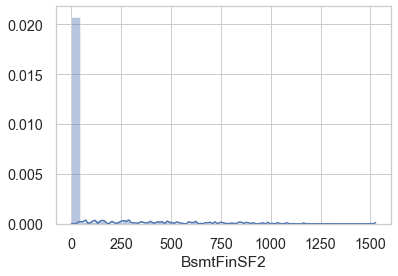

In [48]:
sns.distplot(data_5['BsmtFinSF2'])

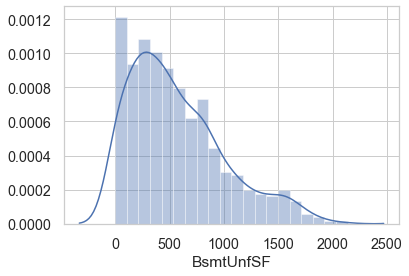

In [49]:
sns.distplot(data_5['BsmtUnfSF'])

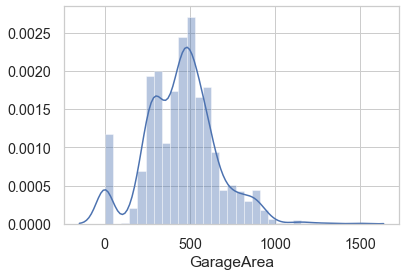

In [50]:
sns.distplot(data_5['GarageArea'])

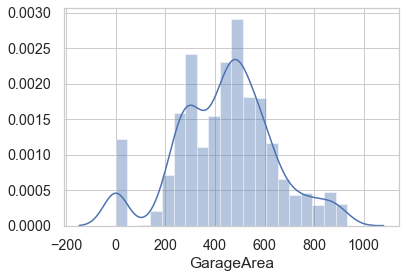

In [51]:
q = data_5['GarageArea'].quantile(0.99)
data_6 = data_5[data_5['GarageArea']<q]
sns.distplot(data_6['GarageArea'])

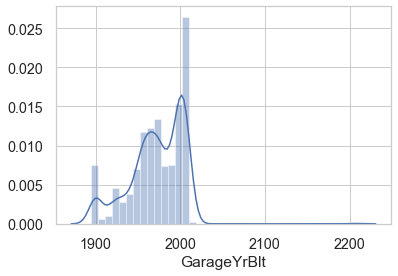

In [52]:
sns.distplot(data_6['GarageYrBlt'])

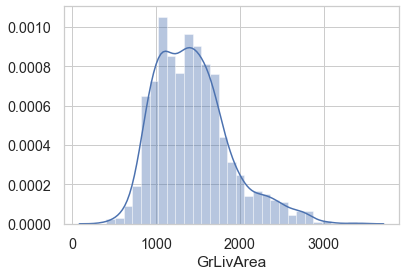

In [53]:
sns.distplot(data_6['GrLivArea'])

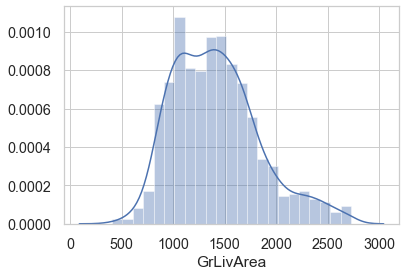

In [54]:
q = data_6['GrLivArea'].quantile(0.99)
data_7 = data_6[data_6['GrLivArea']<q]
sns.distplot(data_7['GrLivArea'])

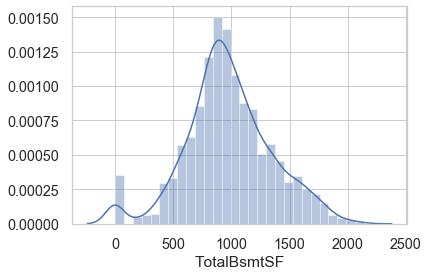

In [55]:
sns.distplot(data_7['TotalBsmtSF'])

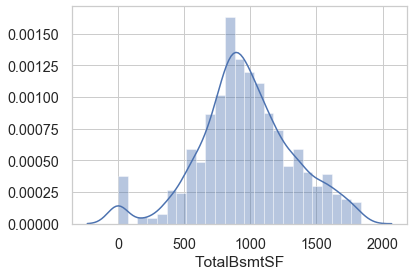

In [56]:
q = data_7['TotalBsmtSF'].quantile(0.99)
data_8 = data_7[data_7['TotalBsmtSF']<q]
sns.distplot(data_8['TotalBsmtSF'])

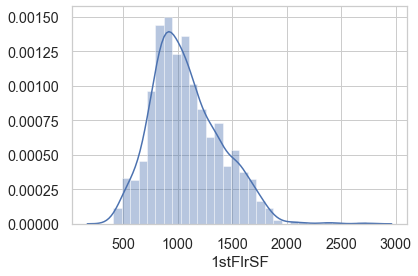

In [57]:
sns.distplot(data_8['1stFlrSF'])

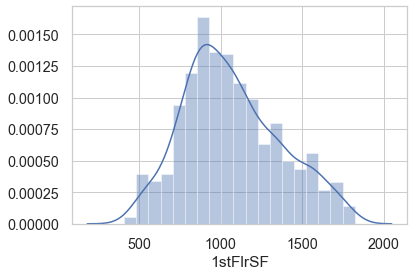

In [58]:
q = data_8['1stFlrSF'].quantile(0.99)
data_9 = data_8[data_8['1stFlrSF']<q]
sns.distplot(data_9['1stFlrSF'])

In [59]:
data_cleaned = data_9.reset_index(drop=True)

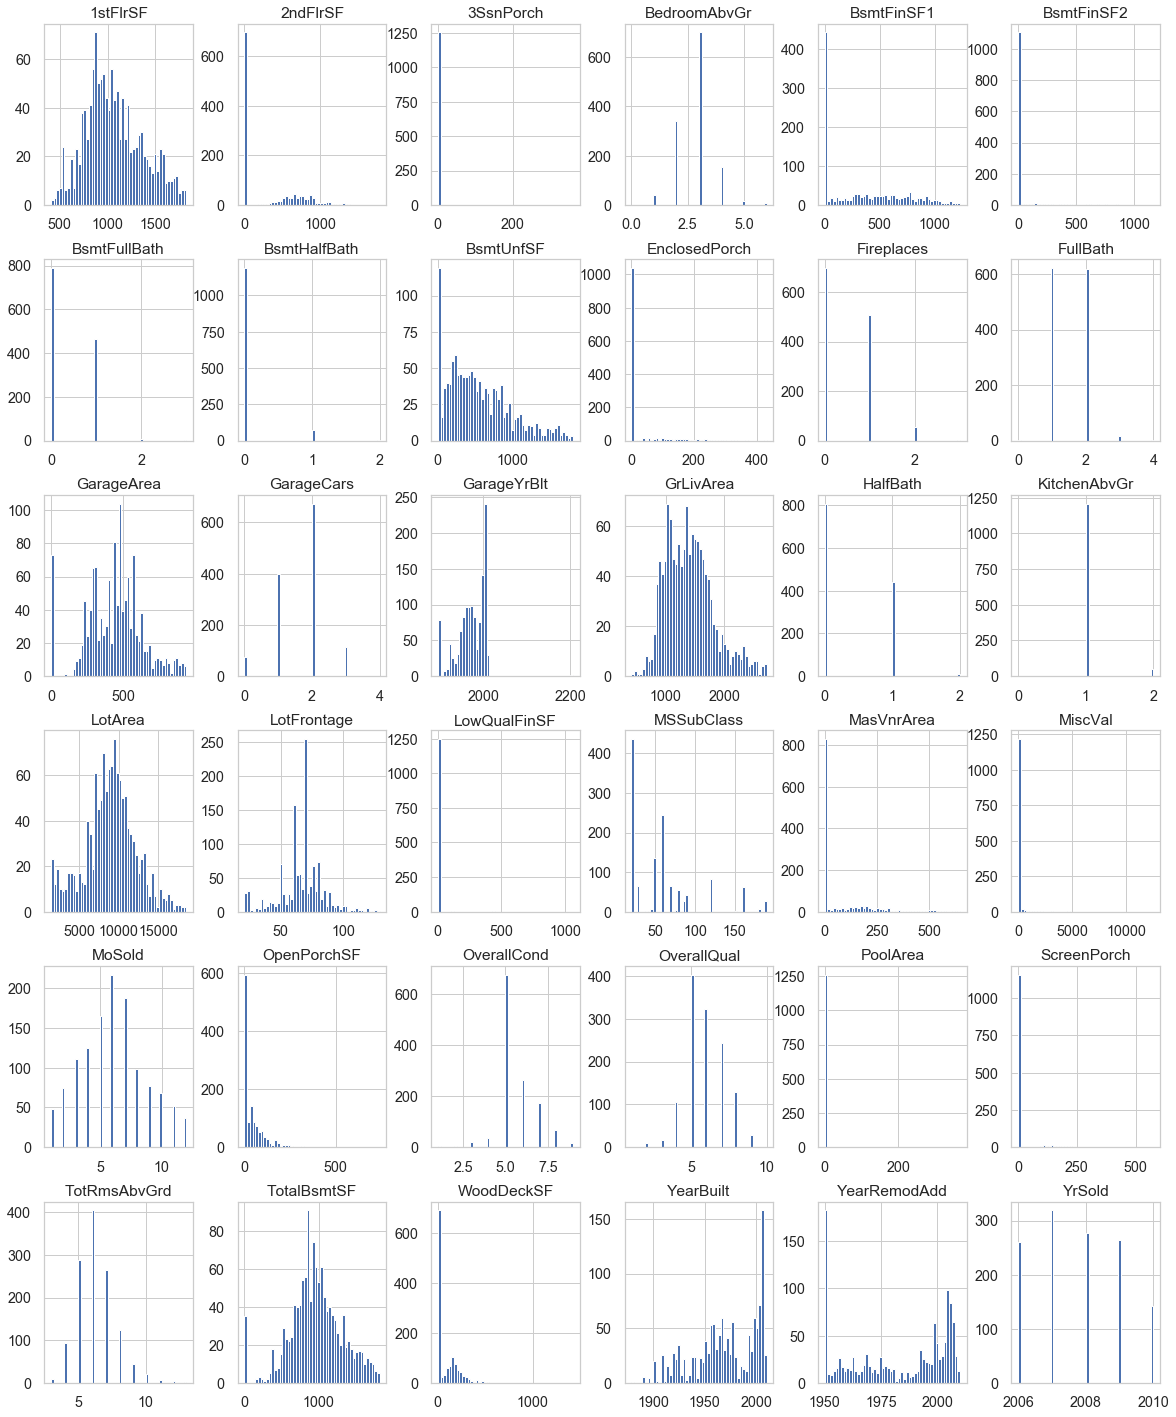

In [60]:
data_cleaned.hist(bins=50, figsize=(20,25))
plt.show()

In [61]:
data_cleaned.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,58.842189,65.799656,8899.754163,5.908010,5.609833,1969.229183,1982.447264,73.098335,362.906027,51.347343,548.233941,962.628073,1066.195083,331.693894,4.099921,1401.988898,0.382236,0.058684,1.518636,0.365583,2.831879,1.038065,6.233148,0.493259,1971.567803,1.659794,438.489294,85.813640,44.038065,23.226011,1.452815,14.118160,0.291832,51.916733,6.064235,2007.769231
std,43.209159,17.541949,3191.532703,1.315153,1.125476,30.501662,21.228383,128.458405,357.281716,168.641457,418.250707,353.615683,297.322544,404.618044,47.353478,411.778676,0.503765,0.238476,0.533640,0.496389,0.785967,0.199549,1.421338,0.587700,31.490732,0.725418,192.331660,118.992234,65.587468,59.422943,18.579568,50.820361,10.363114,480.753655,2.680292,1.298304
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7180.000000,5.000000,5.000000,1951.000000,1962.000000,0.000000,0.000000,0.000000,223.000000,764.000000,855.000000,0.000000,0.000000,1088.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1954.000000,1.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.580357,9000.000000,6.000000,5.000000,1970.000000,1990.000000,0.000000,300.000000,0.000000,462.000000,943.000000,1027.000000,0.000000,0.000000,1361.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1975.000000,2.000000,450.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,75.000000,10800.000000,7.000000,6.000000,1999.000000,2003.000000,125.000000,648.000000,0.000000,796.000000,1175.000000,1264.000000,678.000000,0.000000,1641.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1999.000000,2.000000,556.000000,160.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
90%,120.000000,85.000000,12887.000000,8.000000,7.000000,2005.000000,2006.000000,260.000000,902.000000,144.000000,1144.000000,1434.000000,1511.000000,896.000000,0.000000,1947.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2005.000000,2.000000,670.000000,240.000000,120.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000
95%,160.000000,93.000000,14210.000000,8.000000,8.000000,2007.000000,2007.000000,356.000000,1000.000000,442.000000,1436.000000,1582.000000,1614.000000,1074.000000,0.000000,2233.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2007.000000,3.000000,783.000000,302.000000,173.000000,168.000000,0.000000,144.000000,0.000000,0.000000,11.000000,2010.000000
96%,160.000000,96.000000,14524.200000,8.000000,8.000000,2007.000000,2007.000000,395.800000,1030.000000,510.000000,1493.400000,1614.000000,1651.600000,1115.200000,0.000000,2306.800000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2

In [62]:
#test_data=data_cleaned.copy()
#(test_data[null_columns].isnull().sum()).sort_values(ascending=False)
#numeric_features = test_data.dtypes[test_data.dtypes != 'object'].index
#test_data[numeric_features] = test_data[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))
# After standardizing the data all means vanish, hence we can set missing values to 0
#test_data[numeric_features] = test_data[numeric_features].fillna(0)
#all_features = pd.get_dummies(test_data, dummy_na=True)
#all_features.shape

**Observation:** Majority of the key outliers have been dealt with and as we can see from combined Hist, more or less the key features seems to have normal distribution. The ones which do not have normal distribution, have some vaild values at the extreme ends, like 0 or a Year, hence tampering them will reduce data drastically, so instead, we will let these so-be outliers remain as-is

We will now be relaxing some regression assumptions 

### Correlation Map - Identifying key Features

In [63]:
#(data_cleaned.corr())["SalePrice_Log"].sort_values(ascending = False)[1:]

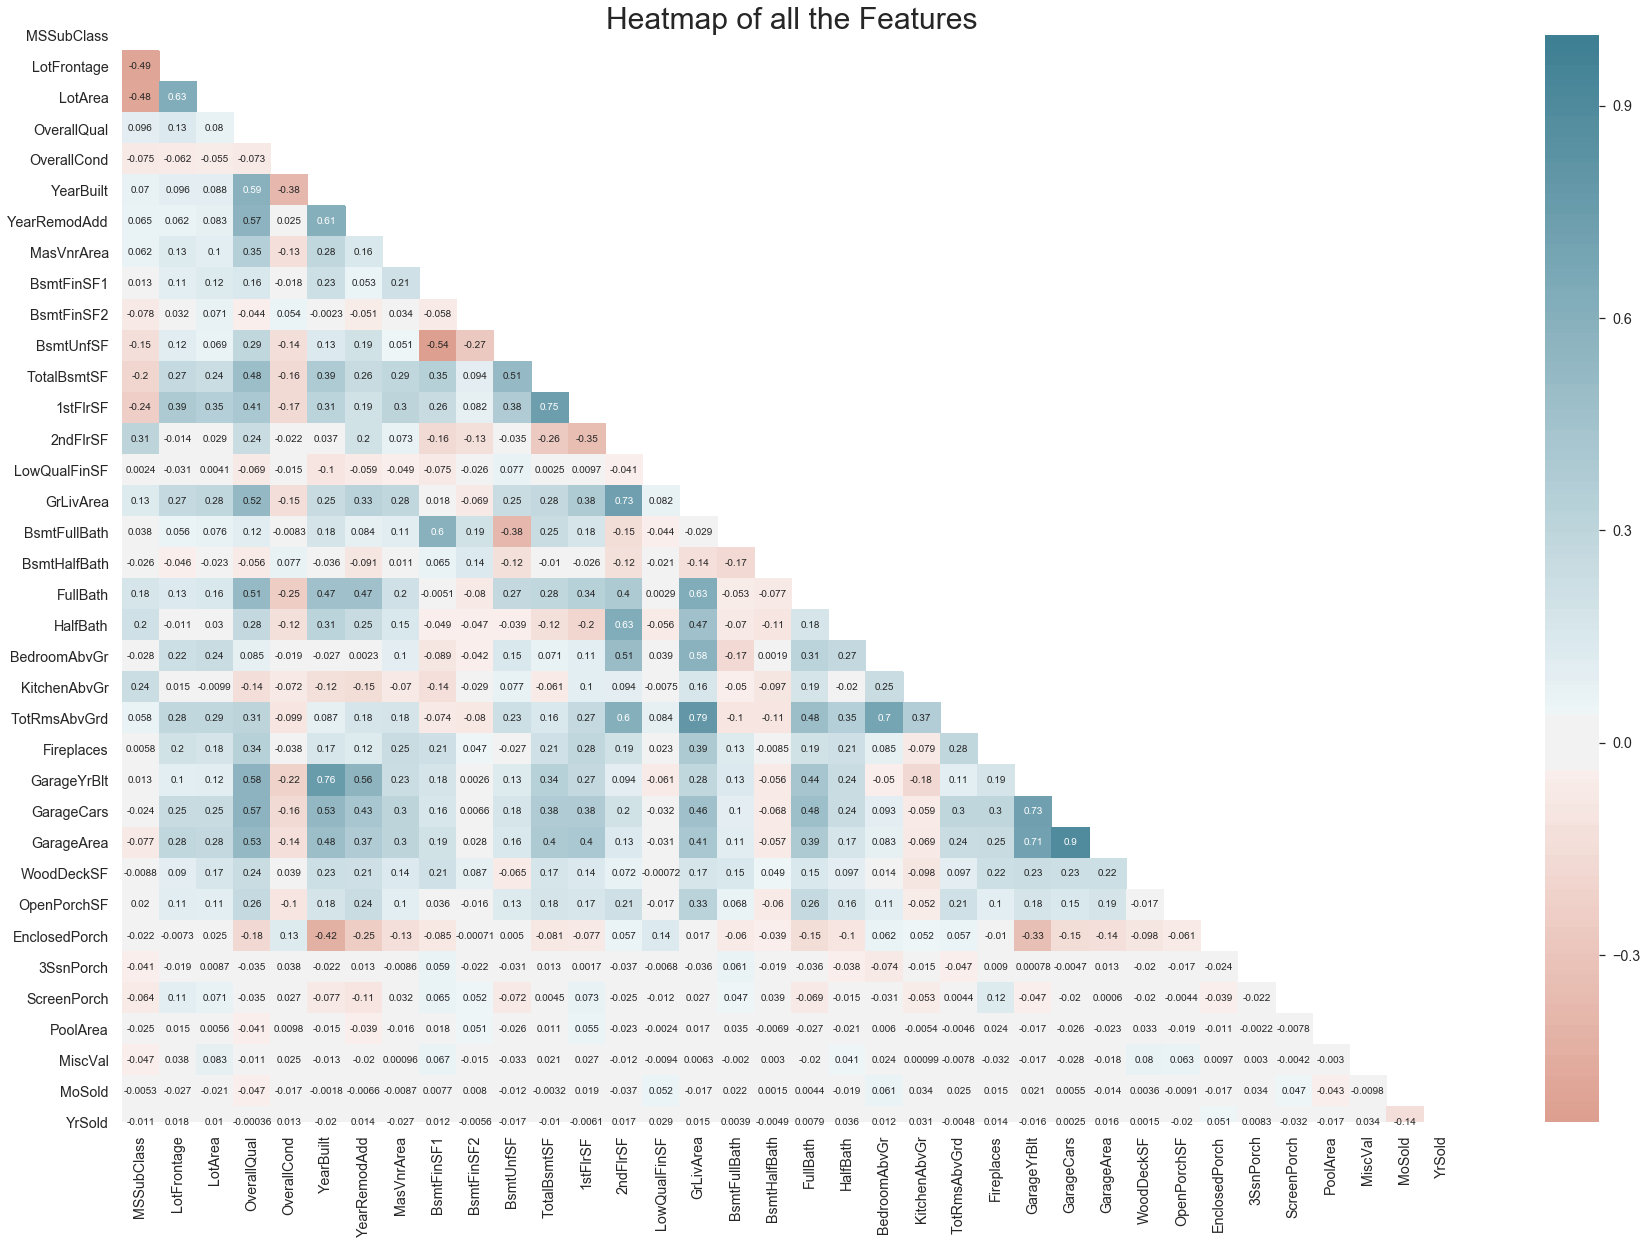

In [64]:
## Let's plot heat map highlighting correlation of all the variables, which will eventually help us in 
## the critical features required for model development
## Plot fig sizing. 
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like((data_cleaned.corr()**2),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data_cleaned.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0, );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

**Observation:** As we can see from the correlation matrix and the heatmap: <br> <br>
Top 5 Features having positive correlation with dependent variable (Sales Price): <br>
1. OverallQual <br>
2. GrLivArea <br>
3. GarageCars <br>
4. GarageArea <br>
5. GarageYrBlt <br> <br>

Top 5 Features having negative correlation with dependent variable (Sales Price): <br>
1. EnclosedPorch <br>
2. KitchenAbvGr <br>
3. LowQualFinSF <br>
4. YrSold <br>
5. MSSubClass

## Checking the OLS assumptions

### Linearity

In [65]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Sale Price Log is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
#f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True, figsize =(25,6)) #sharey -> share 'Price' as y
#ax1.scatter(data_cleaned['YearBuilt'],data_cleaned['SalePrice_Log'])
#ax1.set_title('Sale Price Log and Year Built')
#ax2.scatter(data_cleaned['OverallQual'],data_cleaned['SalePrice_Log'])
#ax2.set_title('Sale Price Log and OverallQual')
#ax3.scatter(data_cleaned['LotArea'],data_cleaned['SalePrice_Log'])
#ax3.set_title('Sale Price Log and LotArea')
#ax4.scatter(data_cleaned['OverallCond'],data_cleaned['SalePrice_Log'])
#ax4.set_title('Sale Price Log and OverallCond')
#ax5.scatter(data_cleaned['TotalBsmtSF'],data_cleaned['SalePrice_Log'])
#ax5.set_title('Sale Price Log and TotalBsmtSF')
#ax6.scatter(data_cleaned['GrLivArea'],data_cleaned['SalePrice_Log'])
#ax6.set_title('Sale Price Log and GrLivArea')
#plt.show()

**Observation:** As we have already taken natural log of sale price and normalized it, we can see linear relationship of sale price with key variables which takes care of the Linearity assumption which is the foundation to ensure that our Linear Model works appropriately. 

### Multicollinearity

In [66]:
data_cleaned.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,58.842189,65.799656,8899.754163,5.908010,5.609833,1969.229183,1982.447264,73.098335,362.906027,51.347343,548.233941,962.628073,1066.195083,331.693894,4.099921,1401.988898,0.382236,0.058684,1.518636,0.365583,2.831879,1.038065,6.233148,0.493259,1971.567803,1.659794,438.489294,85.813640,44.038065,23.226011,1.452815,14.118160,0.291832,51.916733,6.064235,2007.769231
std,43.209159,17.541949,3191.532703,1.315153,1.125476,30.501662,21.228383,128.458405,357.281716,168.641457,418.250707,353.615683,297.322544,404.618044,47.353478,411.778676,0.503765,0.238476,0.533640,0.496389,0.785967,0.199549,1.421338,0.587700,31.490732,0.725418,192.331660,118.992234,65.587468,59.422943,18.579568,50.820361,10.363114,480.753655,2.680292,1.298304
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7180.000000,5.000000,5.000000,1951.000000,1962.000000,0.000000,0.000000,0.000000,223.000000,764.000000,855.000000,0.000000,0.000000,1088.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1954.000000,1.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.580357,9000.000000,6.000000,5.000000,1970.000000,1990.000000,0.000000,300.000000,0.000000,462.000000,943.000000,1027.000000,0.000000,0.000000,1361.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1975.000000,2.000000,450.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,75.000000,10800.000000,7.000000,6.000000,1999.000000,2003.000000,125.000000,648.000000,0.000000,796.000000,1175.000000,1264.000000,678.000000,0.000000,1641.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1999.000000,2.000000,556.000000,160.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,129.000000,18494.000000,10.000000,9.000000,2010.000000,2010.000000,647.000000,1232.000000,1164.000000,1802.000000,1822.000000,1822.000000,1788.000000,1064.000000,2726.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,13.000000,3.000000,2207.000000,4.000000,933.000000,1424.000000,742.000000,432.000000,360.000000,576.000000,368.000000,12500.000000,12.000000,2010.000000


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dropped_columns = []
def calculate_vif(x):
    thresh = 10.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        #print("Iteration no.: ", i)
        #print("VIF: ", vif)
        a = np.argmax(vif)
        #print("Max VIF is for variable no.:", a)
        #print("Column Name:", x.columns[a])
        #print("VIF Value:", vif[a])
        if vif[a] <= thresh :
            #print("Break")
            break
        if i == 1 :          
            #print("i == 1")
            output = x.drop(x.columns[a], axis = 1)
            dropped_columns.append(x.columns[a])
            #print("Dropped Columns = 1 = ", dropped_columns)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            #print("i > 1")
            dropped_columns.append(output.columns[a])
            #print("Dropped Columns > 1 = ", dropped_columns)
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
numeric_features = data_cleaned.dtypes[data_cleaned.dtypes != 'object'].index
variables = data_cleaned[numeric_features]
#variables = variables.drop('SalePrice_Log', axis=1)
print(variables.shape)
train_out = calculate_vif(variables)
print("Dropped Columns = ", dropped_columns)
train_out.shape

(1261, 36)
Dropped Columns =  ['1stFlrSF', 'TotalBsmtSF', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'GrLivArea', 'TotRmsAbvGrd', 'OverallQual', 'GarageCars', 'KitchenAbvGr', 'LotFrontage', 'BedroomAbvGr', 'FullBath', 'OverallCond']


(1261, 21)

In [68]:
# Multiple variables have a very high VIF, we will remove it from the model
# This will drive the VIF of other variables down!!! 
#data_no_multicollinearity = data_cleaned.drop(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'YrSold'],axis=1)
print("Data Cleaned Shape: ",data_cleaned.shape)
data_no_multicollinearity = data_cleaned.drop(['BsmtFinSF1', '1stFlrSF', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'GrLivArea', 'TotRmsAbvGrd', 'OverallQual', 'GarageCars', 'TotalBsmtSF', 'LotFrontage', 'KitchenAbvGr', 'BedroomAbvGr', 'FullBath', 'OverallCond'], axis=1)
#data_no_multicollinearity = data_cleaned.drop(columns=dropped_columns)
#data_no_multicollinearity = data_cleaned.copy()
print("Data with Removed Multicollinearity Columns Shape: ",data_no_multicollinearity.shape)

Data Cleaned Shape:  (1261, 79)
Data with Removed Multicollinearity Columns Shape:  (1261, 63)


In [69]:
data_no_multicollinearity = data_no_multicollinearity.reset_index(drop=True)
data_no_multicollinearity

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
0,20,RH,11622,Pave,NN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,LwQ,144.0,270.0,GasA,TA,Y,SBrkr,0,0,0.0,0.0,0,TA,Typ,0,NN,Attchd,Unf,730.0,TA,TA,Y,140,0,0,0,120,0,NN,MnPrv,NN,0,6,WD,Normal
1,20,RL,14267,Pave,NN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,0.0,406.0,GasA,TA,Y,SBrkr,0,0,0.0,0.0,1,Gd,Typ,0,NN,Attchd,Unf,312.0,TA,TA,Y,393,36,0,0,0,0,NN,NN,Gar2,12500,6,WD,Normal
2,60,RL,13830,Pave,NN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,Unf,0.0,137.0,GasA,Gd,Y,SBrkr,701,0,0.0,0.0,1,TA,Typ,1,TA,Attchd,Fin,482.0,TA,TA,Y,212,34,0,0,0,0,NN,MnPrv,NN,0,3,WD,Normal
3,60,RL,9978,Pave,NN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,Unf,0.0,324.0,GasA,Ex,Y,SBrkr,678,0,0.0,0.0,1,Gd,Typ,1,Gd,Attchd,Fin,470.0,TA,TA,Y,360,36,0,0,0,0,NN,NN,NN,0,6,WD,Normal
4,120,RL,5005,Pave,NN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,0.0,1017.0,GasA,Ex,Y,SBrkr,0,0,0.0,0.0,0,Gd,Typ,0,NN,Attchd,RFn,506.0,TA,TA,Y,0,82,0,0,144,0,NN,NN,NN,0,1,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,160,RM,1526,Pave,NN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,Unf,0.0,546.0,GasA,TA,Y,SBrkr,546,0,0.0,0.0,1,TA,Typ,0,NN,NN,NN,0.0,NN,NN,Y,0,34,0,0,0,0,NN,GdPrv,NN,0,6,WD,Normal
1257,160,RM,1936,Pave,NN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,Unf,0.0,546.0,GasA,Gd,Y,SBrkr,546,0,0.0,0.0,1,TA,Typ,0,NN,NN,NN,0.0,NN,NN,Y,0,0,0,0,0,0,NN,NN,NN,0,6,WD,Normal
1258,160,RM,1894,Pave,NN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,Unf,0.0,294.0,GasA,TA,Y,SBrkr,546,0,0.0,0.0,1,TA,Typ,0,NN,CarPort,Unf,286.0,TA,TA,Y,0,24,0,0,0,0,NN,NN,NN,0,4,WD,Abnorml
1259,85,RL,10441,Pave,NN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,0.0,575.0,GasA,TA,Y,SBrkr,0,0,0.0,1.0,0,TA,Typ,0,NN,NN,NN,0.0,NN,NN,Y,80,32,0,0,0,0,NN,MnPrv,Shed,700,7,WD,Normal


**Observation:** To deal with multicollinearity assumption, we need to we have figured the VIF for each of the independent variable and through an iteration, identified those features which exceed the threshold of 10.0 which we have set as per industry norms. Once identified, we dropped these variables from our analysis to make it clean for further processing.

## Create Dummy Variables

In [70]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [71]:
# Here's the result
data_with_dummies.head()

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning_FV,MSZoning_NN,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NN,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NN,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NN,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NN,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NN,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NN,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NN,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_NN,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_NN,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NN,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NN,GarageFinish_NN,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_NN,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NN,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NN,MiscFeature_NN,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_NN,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,11622,0.0,144.0,270.0,0,0,0.0,0.0,0,0,730.0,140,0,0,0,120,0,0,6,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,

In [72]:
data_with_dummies.shape

(1261, 225)

In [73]:
data_with_dummies.to_csv('E:\\Trainings\\INSAID\\CDF - Machine Learning - Term Project\\data_with_dummies_test.csv', header=True, index_label='Id')

In [74]:
training_cols = ['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'SalePrice_Log', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'Alley_NN', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_NN',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd',
       'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NN',
       'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_NN', 'BsmtCond_Po',
       'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_NN', 'BsmtExposure_No', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_NN',
       'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ',
       'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_NN',
       'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA',
       'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP',
       'Electrical_Mix', 'Electrical_NN', 'Electrical_SBrkr',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_NN',
       'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_NN', 'GarageFinish_NN',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_NN', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_NN', 'GarageCond_Po',
       'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'PoolQC_Gd',
       'PoolQC_NN', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_NN',
       'MiscFeature_NN', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']

In [75]:
final_train_drop_list = []
final_test_drop_list = []

qq = data_with_dummies.columns
cc = 0
for zz in training_cols:
    if (zz not in qq):
        cc +=1
        #print(zz + " ZZ Does not exist")
        final_train_drop_list.append(zz)

qq = data_with_dummies.columns

for zz in qq:
    if (zz not in training_cols):
        cc +=1
        #print(zz + " ZZ Does not exist")
        final_test_drop_list.append(zz)
print(cc)
print(final_train_drop_list)
print(final_test_drop_list)

22
['SalePrice_Log', 'Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_Roll', 'RoofMatl_WdShngl', 'Exterior1st_CBlock', 'Exterior1st_Stone', 'Heating_GasA', 'Heating_OthW', 'Electrical_Mix', 'Electrical_NN', 'GarageQual_Fa', 'PoolQC_Gd', 'PoolQC_NN']
['MSZoning_NN', 'Condition2_PosN', 'KitchenQual_NN', 'Functional_NN', 'SaleType_NN']


In [76]:
data_with_dummies = data_with_dummies.drop(['MSZoning_NN', 'Condition2_PosN', 'KitchenQual_NN', 'Functional_NN', 'SaleType_NN'], axis=1)
data_with_dummies['SalePrice_Log'] = np.nan
data_with_dummies = data_with_dummies.reset_index(drop=True)
data_with_dummies

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NN,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NN,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NN,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NN,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NN,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NN,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NN,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NN,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NN,GarageFinish_NN,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_NN,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NN,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NN,MiscFeature_NN,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice_Log
0,20,11622,0.0,144.0,270.0,0,0,0.0,0.0,0,0,730.0,140,0,0,0,120,0,0,6,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN
1,20,14267,108.0,

In [77]:
data_with_dummies.shape

(1261, 221)

### Rearrange a bit

In [78]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_NN',
       'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighbor

In [79]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['SalePrice_Log','MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_NN',
       'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_NN',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd',
       'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NN',
       'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_NN', 'BsmtCond_Po',
       'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_NN', 'BsmtExposure_No', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_NN',
       'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ',
       'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_NN',
       'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasW',
       'Heating_Grav', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd',
       'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF',
       'Electrical_FuseP', 'Electrical_SBrkr', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2',
       'Functional_Min1', 'Functional_Min2', 'Functional_Mod',
       'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Fa',
       'FireplaceQu_Gd', 'FireplaceQu_NN', 'FireplaceQu_Po',
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NN', 'GarageFinish_NN', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageQual_Gd', 'GarageQual_NN',
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_NN', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P',
       'PavedDrive_Y', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw',
       'Fence_NN', 'MiscFeature_NN', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']

In [80]:
'''
cols1 = ['SalePrice_Log', 'LotArea', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'Fireplaces', 
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 
        'MSZoning_RM', 'Alley_Pave', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_Inside', 
        'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 
        'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 
        'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 
        'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 
        'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition2_Feedr', 'Condition2_Norm', 'BldgType_Twnhs', 
        'BldgType_TwnhsE', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'RoofStyle_Gable', 
        'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 
        'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior2nd_VinylSd', 
        'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_Stone', 'ExterQual_Fa', 'ExterCond_Fa', 
        'Foundation_PConc', 'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_TA', 
        'BsmtExposure_Gd', 'BsmtExposure_NN', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'Heating_GasA', 
        'Heating_GasW', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_TA', 'CentralAir_Y', 
        'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Sev', 'GarageType_Attchd', 
        'GarageType_Basment', 'GarageFinish_Unf', 'GarageQual_TA', 'GarageCond_Po', 'PavedDrive_Y', 'PoolQC_Gd', 
        'Fence_GdWo', 'SaleType_ConLD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Normal', 
        'SaleCondition_Partial']
'''

"\ncols1 = ['SalePrice_Log', 'LotArea', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'Fireplaces', \n        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', \n        'MSZoning_RM', 'Alley_Pave', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_Inside', \n        'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', \n        'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', \n        'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', \n        'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', \n        'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition2_Feedr', 'Condition2_Norm', 'BldgType_Twnhs', \n        'BldgType_TwnhsE', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseSt

In [81]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
#data_preprocessed = data_with_dummies[data_with_dummies.columns.values]
data_preprocessed.head()

,SalePrice_Log,MSSubClass,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NN,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NN,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NN,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NN,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NN,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NN,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NN,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NN,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NN,GarageFinish_NN,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_NN,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NN,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NN,MiscFeature_NN,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,NaN,20,11622,0.0,144.0,270.0,0,0,0.0,0.0,0,0,730.0,140,0,0,0,120,0,0,6,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,NaN,20,14267,10

In [82]:
data_preprocessed.shape

(1261, 221)

In [92]:
data_preprocessed.to_csv("E:\\Trainings\\INSAID\CDF - Machine Learning - Term Project\\test_data.csv", index=False)

**Observation:** So far we have dealt with the following:
1. Read the data and performed initial analysis and descriptive statistics
2. Dealt with Null Values and Outliers
3. Via correlation matrix and heatmap, identified key independent features which have highest positive and negative relation with target variable (sale price)
4. Validated the Linear Regression Assumptions, especially Linearity, Normality, Heteroscedasticity and Multicollinearity
5. Created dummy variables to deal with categorical features
6. We will now progress ahead and create multiple linear regression (as we are dealing with many features in this dataset)

## Linear Regression Model

### Declare Inputs and Targets

In [83]:
# The target(s) (dependent variable) is 'log sale price'
target = data_preprocessed['SalePrice_Log']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['SalePrice_Log'],axis=1)

### Scale the data

In [84]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [85]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [86]:
# Import the module for the split
from sklearn.model_selection import train_test_split
# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)
print('Complete dataset shape:')
print('x shape: ',inputs_scaled.shape)
print('y shape: ',target.shape)
print('Train cases as below:')
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Complete dataset shape:
x shape:  (1261, 220)
y shape:  (1261,)
Train cases as below:
x_train shape:  (1008, 220)
y_train shape:  (1008,)

Test cases as below
x_test shape:  (253, 220)
y_test shape:  (253,)


### Create the regression

In [87]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat
from sklearn import linear_model

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [88]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)
#from sklearn.ensemble import RandomForestRegressor
#reg = RandomForestRegressor(n_estimators = 1000, random_state = 42)
#reg.fit(x_train,y_train);

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)
y_hat

## Model Validation

### 1. Plot the Predictions against the Target and check how well the model has performed 

In [ ]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
#fig = plt.plot(y_train,y_hat, lw=4, c='orange', label ='regression line')
# Let's also name the axes
plt.xlabel('Target (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(10,13)
plt.ylim(10,13)
plt.show()

**Observation:** The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot. The closer the points to the 45-degree line, the better the prediction.
As we can see from the scatter plot based on our prediction, we our predicted data more or less is around the 45-degree line.

### 2. Plot Probability Density Function (PDF) of the Residuals and Check the distribution

In [ ]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

**Observation:** # In the best case scenario this plot should be normally distributed. In our case we notice that there are negative residuals (***far away from the mean***). Given the definition of the residuals (y_train - y_hat), negative values imply
that y_hat (predictions) are higher than y_train (the targets).

### 3. Check the R2 and Adjusted R2 Values

In [ ]:
# Find the R-squared and Adjusted R-squared of the model
# R2
# R-squared is a statistical measure that represents the goodness of fit of a regression model.
# The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.
r_squared = reg.score(x_train,y_train)

# Adjusted R2
# Adjusted r-square is a modified form of r-square whose value increases if new predictors tend to improve model’s
# performance and decreases if new predictors does not improve performance as expected.
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)

print("R2 is :",r_squared.round(3))
print("Adjusted R2 is :",adjusted_r2.round(3))

**Observation:**
1. R-Squared: For our model the R2 is is 0.90, which means our model explains 90% of the variation in the response variable around its mean, so this metric looks good from linear regression perspective
2. Adjusted R2: For our model, the Adjusted R2 is 0.88 or 88% which means that the features we have identified for our predictions are good to start with. We have to make a note of this value based on initially identidied features, and as we keep on adding the features, we need to re-visit this metric every time to see if the newly added feature is relevant (value of Adjusted R2 increases) or irrelevant (value of Adjusted R2 decreases) 

### 4. Check the Mean Squared Error and RMSE

In [ ]:
# MSE:
# 1. The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e.
#    the average squared difference between the estimated values and true value.
# 2. It is a risk function, corresponding to the expected value of the squared error loss.
# 3. It is always non–negative and values close to zero are better.

MSE_train = (metrics.mean_squared_error(y_train, y_hat))
print('MSE for the train set is {}'.format((MSE_train).round(3)))

# RMSE:
# Root Mean Square Error is the measure of how well a regression line fits the data points.
# RMSE can also be construed as Standard Deviation in the residuals.
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_hat))
print('RMSE for the train set is {}'.format((RMSE_train).round(3)))

# RMSE is close to standard deviation, which means that on an average, our std dev for prediction is 0.106 which is very close
# to real / true value

**Observation:** As we can see, the mean standard error for our model is 0.11 and RMSE is 0.10, which is much closer to 0 which is the end-goal. As there are no right or wrong values for these metrics, we need to make note of these values and keep on comparing them by adding / removing features so that the error / noise gets reduced. In our case, we are good for now on the training dataset.

### 5. Test Overall Signigicance of the Model using F-Test

In [ ]:
# This is just for the comparison sake as to how the statsmodels and sklearn outcomes are close or far
import statsmodels.api as sm
x = sm.add_constant(inputs_scaled)
results = sm.OLS(target,x).fit()
results.summary()

**Observation:**
1. Firstly, as F-Statistic is used to test the overall significance of the model.
2. The Null hypothesis says, all the Betas are 0 simultaneously, whereas, the alternative Hypothesis says, at least one Bets differs from 0. Means, if all Beta's are 0, then none of the independent variables matter, therefore, out model has no merit in this case.
3. The p-value for the model (Prob (F-Statistic)) above, is 0.00, which is very low and we can justify that the overall model is significant
4. The lower the F-Statistic, the close to the non-significant model, hence you need to iterate the check the impact of additional variables each time you make changes to test the impact it has on F-Statistic

### Finding the weights (coefficients) and bias (intercept)

In [ ]:
# Obtain the bias (intercept) of the regression
#reg.intercept_

In [ ]:
#reg_summary = pd.DataFrame(data=inputs.columns.values, columns=['Features'])
#reg_summary['Weights'] = reg.coef_
#reg_summary['p-value'] = reg.p
#reg_summary
#large_pvalue = reg_summary[reg_summary['p-value'] <= 0.05]
#print(large_pvalue['Features'])

In [ ]:
#Backward Elimination
cols = list(inputs.columns)
X  = inputs
y = target
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

**Observation:** The above code will perform backward elimination and help us identify list of features where p-value is <=0.05. We can perform next roung of regression with these variables and check if there is any significant improvement in the model outcome. This is just a indication and final judgemental call on which features to include and which not depends on business knowledge and judgement and the data scientise based on the EDA performed.

In [ ]:
data_cleaned['SaleCondition'].unique()

In [ ]:
df_pf_train = pd.DataFrame(np.exp(y_hat), columns=['Prediction'])
y_train = y_train.reset_index(drop=True)
df_pf_train['Target'] = np.exp(y_train)
df_pf_train['Residual'] = df_pf_train['Target'] - df_pf_train['Prediction']
df_pf_train['Difference%'] = np.absolute(df_pf_train['Residual']/df_pf_train['Target']*100)

In [ ]:
pd.options.display.max_rows = 2000
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf_train.sort_values(by=['Difference%'])

In [ ]:
# Let's summarize the prediction observations
# prediction_deviation_threshold holds the % value which will act as a threshold to validate values falling
# below or equal to this threshold, e.g., by setting this to 20, we will check out of 1009 observations, how
# many predicted values fall below or equal to 20.0 %
# This variable will be applicable for train and test predictions

prediction_deviation_threshold = 20.0 

train_prediction_dataset_size = x_train.shape[0]
train_prediction_count = df_pf_train[df_pf_train['Difference%']<=prediction_deviation_threshold].count()[1]
train_prediction_accuracy = train_prediction_count/train_prediction_dataset_size*100
print("Prediction Summary on Training Dataset:")
print("Prediction Deviation Threshold %: ", prediction_deviation_threshold)
print("Total Observations Considered: ", train_prediction_dataset_size)
print("Observations Below or Equal to the Threshold: ", train_prediction_count)
print("Prediction Accuracy %: ", train_prediction_accuracy.round(2))

**Observation:** Based on the output of the regression model, we can summarize our model accuracy as follows:
**Prediction Summary on Training Dataset:**
- **Prediction Deviation Threshold %:** <font color=blue>20.0</font>
- **Total Observations Considered:** <font color=blue>1008</font>
- **Observations Below or Equal to the Threshold:** <font color=blue>951</font>
- **Prediction Accuracy %:** <font color=blue>94.35%</font>

## Testing

In [ ]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

In [ ]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(10,13)
plt.ylim(10,13)
plt.show()

In [ ]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

In [ ]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

In [ ]:
# After displaying y_test, we find what the issue is that the old indexes are preserved
# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

In [ ]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

In [ ]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [ ]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

In [ ]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

In [ ]:
# Sometimes it is useful to check these outputs manually
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

In [ ]:
MSE_test = (metrics.mean_squared_error(y_test, y_hat_test))                        # compute the RMSE of our predictions
print('MSE for the test set is {}'.format((MSE_test).round(3)))
RMSE_test = np.sqrt( metrics.mean_squared_error(y_test, y_hat_test))
print('RMSE for the test set is {}'.format((RMSE_test).round(3)))

# Find the R-squared and Adjusted R-squared of the model
# R2
r_squared_test = reg.score(x_test,y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2_test = 1-(1-r_squared_test)*(n-1)/(n-p-1)

print("R2 for Test is :",r_squared_test.round(3))
print("Adjusted for Test R2 is :",adjusted_r2_test.round(3))

In [ ]:
#df_pf_train
test_prediction_dataset_size = x_test.shape[0]
test_prediction_count = df_pf[df_pf['Difference%']<=prediction_deviation_threshold].count()[1]
test_prediction_accuracy = test_prediction_count/test_prediction_dataset_size*100
print("Prediction Summary on Testing Dataset:")
print("Prediction Deviation Threshold %: ", prediction_deviation_threshold)
print("Total Observations Considered: ", test_prediction_dataset_size)
print("Observations Below or Equal to the Threshold: ", test_prediction_count)
print("Prediction Accuracy %: ", test_prediction_accuracy.round(2))

**Observation:** Based on the output of the regression model, we can summarize our model accuracy as follows:
**Prediction Summary on Testing Dataset:**
- **Prediction Deviation Threshold %:** <font color=blue>20.0</font>
- **Total Observations Considered:** <font color=blue>253</font>
- **Observations Below or Equal to the Threshold:** <font color=blue>222</font>
- **Prediction Accuracy %:** <font color=blue>87.75%</font>